In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

print(train_df.shape)
print(test_df.shape)

(348978, 51)
(523466, 50)


In [3]:
train_df.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [4]:
all_df = pd.concat([train_df, test_df])
print(all_df.shape)

(872444, 51)


In [5]:
all_df.head()

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,NaN,db,iq,ep,ip,db,ep,tn,tn,ep,...,tn,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0.0,id_11
1,da,qt,iq,iq,hm,db,tn,tn,tn,tn,...,hr,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,0.0,id_33
2,gf,mm,ce,tn,hr,db,ep,tn,tn,ep,...,hr,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,0.0,id_51
3,NaN,es,iq,ep,ce,tn,ep,tn,tn,ep,...,ep,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0.0,id_54
4,da,xy,hr,iq,hm,db,tn,tn,tn,tn,...,ep,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,0.0,id_62


In [8]:
numeric_features = [
    'cat_var_19',
    'cat_var_20',
    'cat_var_21',
    'cat_var_22',
    'cat_var_23',
    'cat_var_24',
    'cat_var_25',
    'cat_var_26',
    'cat_var_27',
    'cat_var_28',
    'cat_var_29',
    'cat_var_30',
    'cat_var_31',
    'cat_var_32',
    'cat_var_33',
    'cat_var_34',
    'cat_var_35',
    'cat_var_36',
    'cat_var_37',
    'cat_var_38',
    'cat_var_39',
    'cat_var_40',
    'cat_var_41',
    'cat_var_42',
    'num_var_3',
    'cat_var_11',
    'cat_var_10',
    'cat_var_15',
    'cat_var_14',    
    'cat_var_7',
    'cat_var_4',
    'cat_var_5'      
]

In [10]:
from sklearn.preprocessing import LabelEncoder as LabelEncoder

for i in range(1, 19):
    feature = 'cat_var_{}'.format(i)
    print(feature)
    all_df[feature] = all_df[feature].fillna('Invalid')
    le = LabelEncoder().fit(all_df[feature])
    all_df[feature] = le.transform(all_df[feature])

cat_var_1
cat_var_2
cat_var_3
cat_var_4
cat_var_5
cat_var_6
cat_var_7
cat_var_8
cat_var_9
cat_var_10
cat_var_11
cat_var_12
cat_var_13
cat_var_14
cat_var_15
cat_var_16
cat_var_17
cat_var_18


In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(all_df[numeric_features])

In [12]:
all_x_df = pd.DataFrame(X_train_minmax)

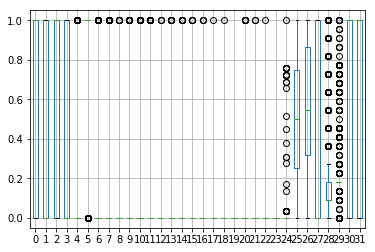

In [13]:
all_x_df.boxplot()

In [14]:
train_x_df = all_x_df[:348978]
test_df = all_x_df[348978:]

print(train_df.shape)
print(test_df.shape)

(348978, 51)
(523466, 32)


In [15]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

train_X, valid_X, train_y, valid_y = train_test_split(train_x_df.as_matrix(), 
                                                      train_df['target'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)

print(type(train_X))
print(type(valid_X))

print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

Using TensorFlow backend.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(279182, 32)
(69796, 32)
(279182,)
(69796,)


# Train

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [22]:
# 656
model = Sequential()
model.add(Dense(4, activation='tanh', input_dim=32))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.callbacks import EarlyStopping  
callbacks = [EarlyStopping(monitor='val_loss', patience=30)]  

In [27]:
model.compile(optimizer='nadam',
              loss='mean_squared_error')

In [28]:
model.fit(train_X, train_y, batch_size=10000, epochs=2000, validation_data=(valid_X, valid_y),verbose=True, callbacks=callbacks)

Train on 279182 samples, validate on 69796 samples
Epoch 1/2000
279182/279182 [==============================] - 0s - loss: 0.0904 - val_loss: 0.0883
Epoch 2/2000
279182/279182 [==============================] - 0s - loss: 0.0869 - val_loss: 0.0852
Epoch 3/2000
279182/279182 [==============================] - 0s - loss: 0.0846 - val_loss: 0.0841
Epoch 4/2000
279182/279182 [==============================] - 0s - loss: 0.0839 - val_loss: 0.0835
Epoch 5/2000
279182/279182 [==============================] - 0s - loss: 0.0833 - val_loss: 0.0830
Epoch 6/2000
279182/279182 [==============================] - 0s - loss: 0.0829 - val_loss: 0.0826
Epoch 7/2000
279182/279182 [==============================] - 0s - loss: 0.0824 - val_loss: 0.0824
Epoch 8/2000
279182/279182 [==============================] - 0s - loss: 0.0821 - val_loss: 0.0818
Epoch 9/2000
279182/279182 [==============================] - 0s - loss: 0.0817 - val_loss: 0.0817
Epoch 10/2000
279182/279182 [=============================

279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0797
Epoch 83/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0798
Epoch 84/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0797
Epoch 85/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0799
Epoch 86/2000
279182/279182 [==============================] - 0s - loss: 0.0799 - val_loss: 0.0797
Epoch 87/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0797
Epoch 88/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0797
Epoch 89/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0797
Epoch 90/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0798
Epoch 91/2000
279182/279182 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0798
Epoch 92/2000


279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 164/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0796
Epoch 165/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0795
Epoch 166/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0795
Epoch 167/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0796
Epoch 168/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0795
Epoch 169/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0795
Epoch 170/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0796
Epoch 171/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0795
Epoch 172/2000
279182/279182 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0796
Epoch

279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 245/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 246/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0794
Epoch 247/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0794
Epoch 248/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0794
Epoch 249/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 250/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 251/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0794
Epoch 252/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0795
Epoch 253/2000
279182/279182 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0794
Epoch

279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 326/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0793
Epoch 327/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 328/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 329/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0795
Epoch 330/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 331/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 332/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0793
Epoch 333/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0794
Epoch 334/2000
279182/279182 [==============================] - 0s - loss: 0.0795 - val_loss: 0.0793
Epoch

279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 407/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 408/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 409/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0794
Epoch 410/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 411/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 412/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 413/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 414/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 415/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch

279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 488/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 489/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0793
Epoch 490/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0792
Epoch 491/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0792
Epoch 492/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0792
Epoch 493/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0792
Epoch 494/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 495/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 496/2000
279182/279182 [==============================] - 0s - loss: 0.0794 - val_loss: 0.0792
Epoch

279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 569/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 570/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 571/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 572/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 573/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 574/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0793
Epoch 575/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 576/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 577/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch

279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 650/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0791
Epoch 651/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 652/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 653/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 654/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0791
Epoch 655/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0791
Epoch 656/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0791
Epoch 657/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0792
Epoch 658/2000
279182/279182 [==============================] - 0s - loss: 0.0793 - val_loss: 0.0793
Epoch

279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 731/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 732/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 733/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 734/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 735/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 736/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0792
Epoch 737/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0792
Epoch 738/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch 739/2000
279182/279182 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0791
Epoch

In [29]:
y_predict = model.predict(valid_X)

In [30]:
from sklearn.metrics import roc_auc_score as roc_auc_score

In [31]:
print(roc_auc_score(valid_y, y_predict))

# 0.579557774212
# 0.655037184942

0.655037184942


In [32]:
y_predict = model.predict(train_x_df.as_matrix())

In [33]:
train_df = pd.read_csv("../input/train.csv")

In [34]:
sample_submission_df = pd.DataFrame()

sample_submission_df['transaction_id'] = train_df['transaction_id']
sample_submission_df['cnn_score'] = y_predict
sample_submission_df.head()

,transaction_id,cnn_score
0,id_11,0.067122
1,id_33,0.073221
2,id_51,0.130756
3,id_54,0.085901
4,id_62,0.073685


In [35]:
sample_submission_df.to_csv('cnn_203_train.csv', index=False)

# Criar CSV para submissão

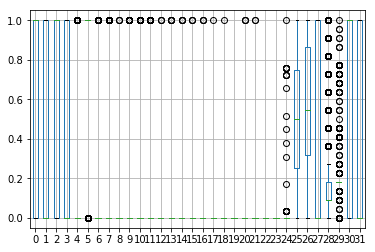

In [36]:
test_df.boxplot()

In [37]:
test_df.shape

(523466, 32)

In [38]:
y_predict = model.predict(test_df.as_matrix())

In [39]:
test_df = pd.read_csv("../input/test.csv")

In [40]:
sample_submission_df = pd.DataFrame()

sample_submission_df['transaction_id'] = test_df['transaction_id']
sample_submission_df['cnn_score'] = y_predict
sample_submission_df.head()

,transaction_id,cnn_score
0,id_1,0.073143
1,id_6,0.080791
2,id_9,0.073771
3,id_14,0.080263
4,id_15,0.075131


In [41]:
sample_submission_df.to_csv('cnn_203_test.csv', index=False)